# 概率

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l
import tensorflow_probability as tfp

In [5]:
fair_probs = tf.ones(6) /6
print(fair_probs)

tf.Tensor([0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667], shape=(6,), dtype=float32)


In [6]:
tfp.distributions.Multinomial(1,fair_probs).sample()

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0.], dtype=float32)>

In [8]:
tfp.distributions.Multinomial(10, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([2., 3., 1., 1., 2., 1.], dtype=float32)>

In [9]:
counts = tfp.distributions.Multinomial(1000, fair_probs).sample()

In [10]:
counts / 1000

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.161, 0.156, 0.181, 0.17 , 0.175, 0.157], dtype=float32)>

In [12]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)
print(counts)

tf.Tensor(
[[2. 1. 2. 2. 2. 1.]
 [0. 2. 2. 0. 2. 4.]
 [1. 2. 3. 0. 2. 2.]
 ...
 [3. 1. 2. 1. 3. 0.]
 [3. 1. 3. 3. 0. 0.]
 [3. 2. 1. 1. 3. 0.]], shape=(500, 6), dtype=float32)


In [14]:
cum_counts = tf.cumsum(counts, axis=0)
print(cum_counts)

tf.Tensor(
[[  2.   1.   2.   2.   2.   1.]
 [  2.   3.   4.   2.   4.   5.]
 [  3.   5.   7.   2.   6.   7.]
 ...
 [878. 820. 835. 804. 831. 812.]
 [881. 821. 838. 807. 831. 812.]
 [884. 823. 839. 808. 834. 812.]], shape=(500, 6), dtype=float32)


tf.Tensor(
[[  10.]
 [  20.]
 [  30.]
 [  40.]
 [  50.]
 [  60.]
 [  70.]
 [  80.]
 [  90.]
 [ 100.]
 [ 110.]
 [ 120.]
 [ 130.]
 [ 140.]
 [ 150.]
 [ 160.]
 [ 170.]
 [ 180.]
 [ 190.]
 [ 200.]
 [ 210.]
 [ 220.]
 [ 230.]
 [ 240.]
 [ 250.]
 [ 260.]
 [ 270.]
 [ 280.]
 [ 290.]
 [ 300.]
 [ 310.]
 [ 320.]
 [ 330.]
 [ 340.]
 [ 350.]
 [ 360.]
 [ 370.]
 [ 380.]
 [ 390.]
 [ 400.]
 [ 410.]
 [ 420.]
 [ 430.]
 [ 440.]
 [ 450.]
 [ 460.]
 [ 470.]
 [ 480.]
 [ 490.]
 [ 500.]
 [ 510.]
 [ 520.]
 [ 530.]
 [ 540.]
 [ 550.]
 [ 560.]
 [ 570.]
 [ 580.]
 [ 590.]
 [ 600.]
 [ 610.]
 [ 620.]
 [ 630.]
 [ 640.]
 [ 650.]
 [ 660.]
 [ 670.]
 [ 680.]
 [ 690.]
 [ 700.]
 [ 710.]
 [ 720.]
 [ 730.]
 [ 740.]
 [ 750.]
 [ 760.]
 [ 770.]
 [ 780.]
 [ 790.]
 [ 800.]
 [ 810.]
 [ 820.]
 [ 830.]
 [ 840.]
 [ 850.]
 [ 860.]
 [ 870.]
 [ 880.]
 [ 890.]
 [ 900.]
 [ 910.]
 [ 920.]
 [ 930.]
 [ 940.]
 [ 950.]
 [ 960.]
 [ 970.]
 [ 980.]
 [ 990.]
 [1000.]
 [1010.]
 [1020.]
 [1030.]
 [1040.]
 [1050.]
 [1060.]
 [1070.]
 [1080.]
 [1090.]
 [1100.]

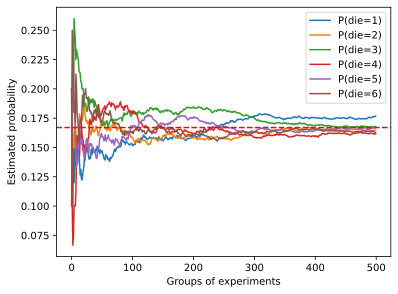

In [18]:
print(tf.reduce_sum(cum_counts, axis=1, keepdims=True))
estimates = cum_counts/ tf.reduce_sum(cum_counts, axis=1, keepdims=True)
print(estimates)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(), label=f"P(die={i+1})")
d2l.plt.axhline(y=0.167, color='red', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()
